In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il
import glob
import itertools as it
import random
import warnings
import collections
import dill

from scipy import optimize


%load_ext ipydex.displaytools
%matplotlib inline


In [3]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.rcParams['text.usetex'] = False

In [4]:
hist_dict_path = "dicts"
hist_dict_list = glob.glob(f"{hist_dict_path}/*.dill")
hist_dict_list.sort()

In [5]:
res = collections.defaultdict(list)
for hist_dict_path in hist_dict_list:
    with open(hist_dict_path, "rb") as fp:
        hist_dict = dill.load(fp)
        
    for k, v in hist_dict.items():
        res[k].extend(v)


# todo: this has the wrong data type        
bad_cells = res.pop("bad_cells")

In [6]:
import matplotlib
q = [f.name for f in matplotlib.font_manager.fontManager.ttflist]

In [23]:
font = \
{
    'color':  'tab:blue',
    'family': 'serif',
    'weight': 'normal',
    # 'fontname': "cmtt10",
    'size': 10,
    
}

There was an error in the displaytools extension (probably due to unsupported syntax).
This is the error message:

list index out of range

We leave this cell unchanged.


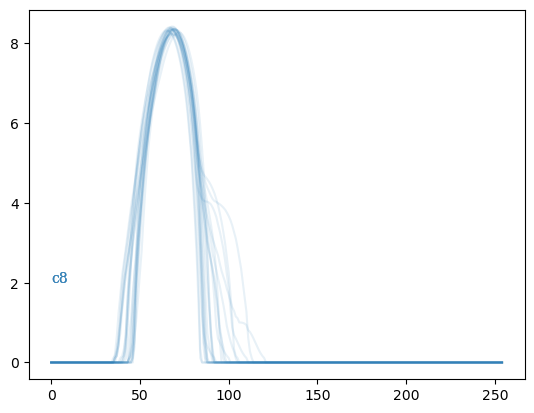

In [24]:
plt.rcParams['text.antialiased'] = True

def plot_hists(key, alpha=0.1, y_offset=0):
    
    ii = np.arange(255)
    for hist in res[(key[0], key[1:])]:
        plt.plot(ii, hist + y_offset, color="tab:blue", alpha=alpha)
        plt.text(0, y_offset + 2, f"{key}", fontdict=font, alpha=0.1)
        
plot_hists("c8")

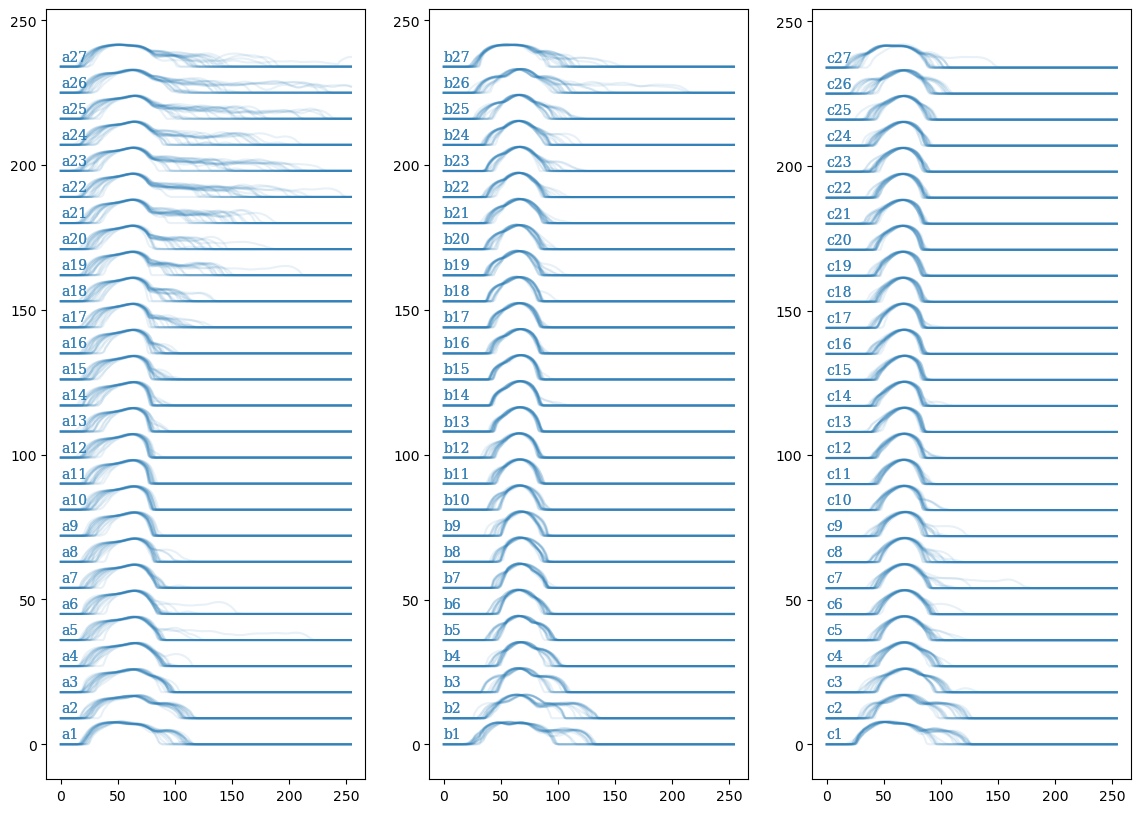

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14, 10));

cell_tups = list(res.keys())

N = 27
for j in range(3):
    plt.sca(axes[j])
    for i, ct in enumerate(cell_tups[j*N:(j+1)*N]):
        plot_hists("".join(ct), y_offset=i*9)
        